## Exploratory Data Analysis on Chicago Divvy Bicycle Sharing Data

Table of contents:

>>[Exploratory Data Analysis on Chicago Divvy Bicycle Sharing Data](#scrollTo=2OVLmRk9x1IB)

>>[Dataset Description](#scrollTo=ZFLXU2woRy8k)

>>[Features](#scrollTo=ZFLXU2woRy8k)

>>[Resources for this project](#scrollTo=ZFLXU2woRy8k)

>>[Importing the dataset](#scrollTo=sVjuOCzr9YC_)

>>[Data Cleaning](#scrollTo=RmNw_44DBmwn)



![alt text](https://d21xlh2maitm24.cloudfront.net/chi/DivvyLogo_p_v2.svg?mtime=20170608140727)

##Dataset Description

This dataset

##Features
- trip_id
- year
- month
- week
- day
- hour
- usertype
- gender
- starttime
- stoptime
- tripduration (minutes)
- temperature (fahrenheit)
- events (e.g. thunderstorm, rain or snow)
- from_station_id
- from_station_name
- latitude_start
- longitude_start
- dpcapacity_start
- to_station_id
- to_station_name
- latitude_end
- longitude_end
- dpcapacity_end 

## Resources for this project
- Pandas tutorial:
- Jifu Zhao github repo: https://github.com/JifuZhao/Chicago_Divvy

## Importing the dataset

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import os, gc

%matplotlib inline

In [4]:
# Data is in .csv format
# We will import it into a pandas dataframe

data_r = pd.read_csv('~/Documents/Programs/Bikeshare-EDA/data/data_raw.csv',
                     parse_dates=['starttime', 'stoptime']) # import raw data
data_r.describe() # notice the count so we can see what we need to check out for cleaning


,trip_id,tripduration,from_station_id,latitude_start,longitude_start,dpcapacity_start,to_station_id,latitude_end,longitude_end,dpcapacity_end,temperature,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,rain
count,1.377472e+07,1.377472e+07,1.377472e+07,1.377356e+07,1.377356e+07,1.377356e+07,1.377472e+07,1.377354e+07,1.377354e+07,1.377354e+07,1.377472e+07,1.377472e+07,1.377472e+07,1.377380e+07,1.377472e+07,1.377472e+07,1.377472e+07,1.377472e+07,1.377472e+07
mean,9.087921e+06,1.008850e+03,1.716233e+02,4.189906e+01,-8.764150e+01,2.211155e+01,1.717968e+02,4.189951e+01,-8.764161e+01,2.208462e+01,6.469147e+01,-8.547086e+02,4.865292e+01,5.887791e+01,2.676514e+01,7.915967e+00,7.199283e+00,-9.315680e+03,3.111651e-02
std,5.025109e+06,1.900591e+03,1.212388e+02,3.404638e-02,2.216130e-02,8.443849e+00,1.214294e+02,3.419141e-02,2.226233e-02,8.454352e+00,8.111245e+01,3.566845e+02,8.349890e+01,1.696895e+01,1.800677e+02,1.309465e+02,1.759217e+02,2.523014e+03,1.736326e-01
min,3.940000e+03,6.000000e+01,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,-9.999000e+03,-9.990000e+02,-9.999000e+03,1.300000e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00
25%,4.857076e+06,4.150000e+02,7.300000e+01,4.188096e+01,-8.765311e+01,1.500000e+01,7.300000e+01,4.188096e+01,-8.765350e+01,1.500000e+01,5.590000e+01,-9.990000e+02,3.990000e+01,4.600000e+01,2.989000e+01,1.000000e+01,6.900000e+00,-9.999000e+03,0.000000e+00
50%,9.255393e+06,7.150000e+02,1.520000e+02,4.189186e+01,-8.763851e+01,1.900000e+01,1.500000e+02,4.189228e+01,-8.763851e+01,1.900000e+01,6.980000e+01,-9.990000e+02,5.200000e+01,5.800000e+01,3.000000e+01,1.000000e+01,1.040000e+01,-9.999000e+03,0.000000e+00
75%,1.345958e+07,1.194000e+03,2.580000e+02,4.191831e+01,-8.762629e+01,2.700000e+01,2.590000e+02,4.191844e+01,-8.762629e+01,2.700000e+01,7.810000e+01,-9.990000e+02,6.100000e+01,7.100000e+01,3.011000e+01,1.000000e+01,1.380000e+01,-9.999000e+03,0.000000e+00
max,1.753670e+07,8.639900e+04,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,9.610000e+01,4.520000e+01,7.810000e+01,1.000000e+02,3.083000e+01,1.000000e+01,4.260000e+01,8.700000e-01,1.000000e+00


In [5]:
data_r.head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_id,from_station_name,latitude_start,longitude_start,...,windchill,dewpoint,humidity,pressure,visibility,wind_speed,precipitation,events,rain,conditions
0,4118,Customer,NaN,2013-06-27 12:11:00,2013-06-27 12:16:00,316,85,Michigan Ave & Oak St,41.90096,-87.623777,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
1,4095,Subscriber,Male,2013-06-27 12:06:00,2013-06-27 12:11:00,301,85,Michigan Ave & Oak St,41.90096,-87.623777,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
2,4192,Subscriber,Male,2013-06-27 12:15:00,2013-06-27 12:16:00,60,28,Larrabee St & Menomonee St,41.91468,-87.643320,...,-999.0,69.1,55.0,29.75,10.0,13.8,-9999.0,mostlycloudy,0,Mostly Cloudy
3,4275,Customer,NaN,2013-06-27 14:44:00,2013-06-27 14:45:00,64,32,Racine Ave & Congress Pkwy,41.87464,-87.657030,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds
4,4291,Customer,NaN,2013-06-27 14:58:00,2013-06-27 15:05:00,433,32,Racine Ave & Congress Pkwy,41.87464,-87.657030,...,-999.0,64.0,43.0,29.73,10.0,17.3,-9999.0,partlycloudy,0,Scattered Clouds


## Data Cleaning

As we can see from the above description of our raw data there are several categories with missing entries. We will clean our data by omitting or averaging certain rows. Here are the changes we will be making:
- Keep rows with no gender because customers that arent subscribers shouldnt be excluded
- Trip duration is in seconds, so lets change it to minutes
- Remove trips less than a minute and over an hour
- Remove entries with no start/end latitude
- Remove entries with no humidity value
- Split the date and time into multiple fields
- Combine some of the weather events into broader categories

The goal here is to attenuate the size a bit and create a new csv with the cleaned data so that we dont have to load in the raw data every time.

In [6]:
#Cleaning
data_c = data_r[(data_r['tripduration'] >= 60) & (data_r['tripduration'] <= 3600)]
data_c = data_c[~data_c['humidity'].isnull()]
data_c = data_c[~data_c['latitude_start'].isnull()]
data_c = data_c[~data_c['latitude_end'].isnull()]
data_c['tripduration'] = data_c['tripduration'] / 60.0

# date separation (credit to Jifu Zhao, the creator of this dataset, for this part of the cleaning)
# extract detailed time information
date = np.array(list(map(lambda x: (x.year, x.month, x.week, x.dayofweek, x.hour), data_c['starttime'])))
data_c['year'] = date[:, 0]
data_c['month'] = date[:, 1]
data_c['week'] = date[:, 2]
data_c['day'] = date[:, 3]
data_c['hour'] = date[:, 4]
data_c = data_c[data_c['year'] > 2013]
    
# extract the weather events information
def events_map(event):
    maps = {'tstorms': 'rain', 'rain': 'rain', 'cloudy': 'cloudy', 'unknown': 'unknown', 
            'mostlycloudy': 'cloudy', 'partlycloudy': 'cloudy', 'clear': 'clear', 'hazy': 'not clear',
            'fog': 'not clear', 'snow': 'snow/ice', 'sleet': 'snow/ice'}
    return maps[event]
    
data_c['events'] = list(map(events_map, data_c['events']))

# save used informaiton
columns = ['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender', 'starttime', 
                'stoptime', 'tripduration', 'temperature', 'events', 'from_station_id', 'from_station_name', 
                'latitude_start', 'longitude_start', 'dpcapacity_start', 'to_station_id', 'to_station_name',
                'latitude_end', 'longitude_end', 'dpcapacity_end']
data_c.to_csv('~/Documents/Programs/Bikeshare-EDA/data/data_clean.csv', columns=columns, index=False)
_ = gc.collect()

## Exploration and Visualization

Before we start visualizing the data, lets do a little research into what the weather terms and values mean.

- Dewpoint: 

In [1]:
# Run this cell every time we open the file to do analysis work
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the clean dataset
data = pd.read_csv('~/Documents/Programs/Bikeshare-EDA/data/data_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12736726 entries, 0 to 12736725
Data columns (total 23 columns):
trip_id              int64
year                 int64
month                int64
week                 int64
day                  int64
hour                 int64
usertype             object
gender               object
starttime            object
stoptime             object
tripduration         float64
temperature          float64
events               object
from_station_id      int64
from_station_name    object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id        int64
to_station_name      object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtypes: float64(8), int64(8), object(7)
memory usage: 2.2+ GB


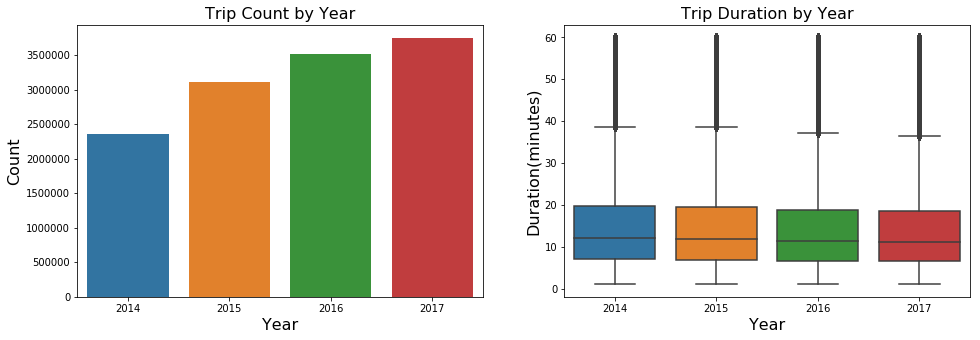

In [4]:
# yearly distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.countplot(x='year', data=data, ax=ax[0])
ax[0].set_title('Trip Count by Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)

sns.boxplot(x='year', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration by Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=16)
ax[1].set_ylabel('Duration(minutes)', fontsize=16)

plt.show()

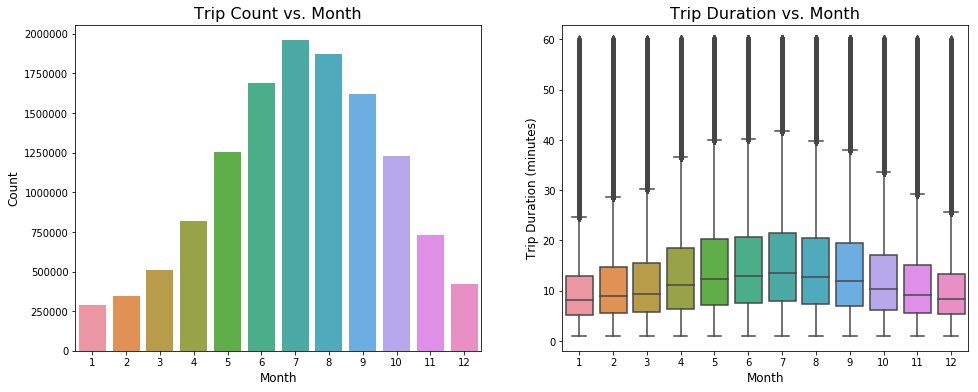

In [9]:
# monthly distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()


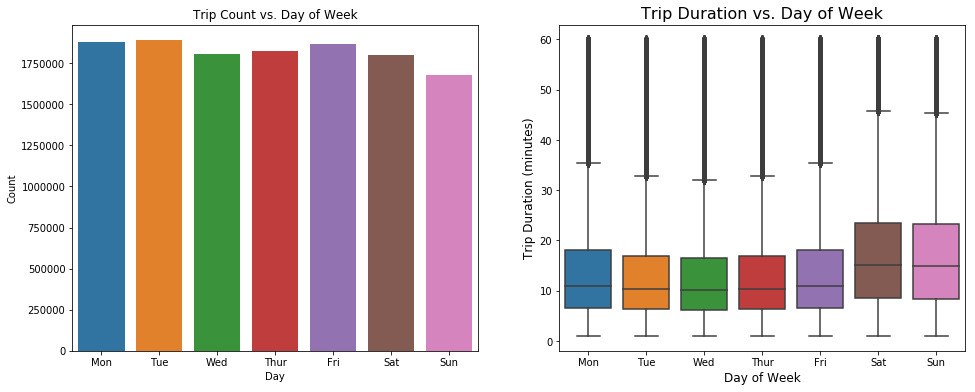

In [12]:
# daily distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='day', data=data, ax=ax[0])
ax[0].set_title("Trip Count vs. Day of Week")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
sns.boxplot(x='day', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

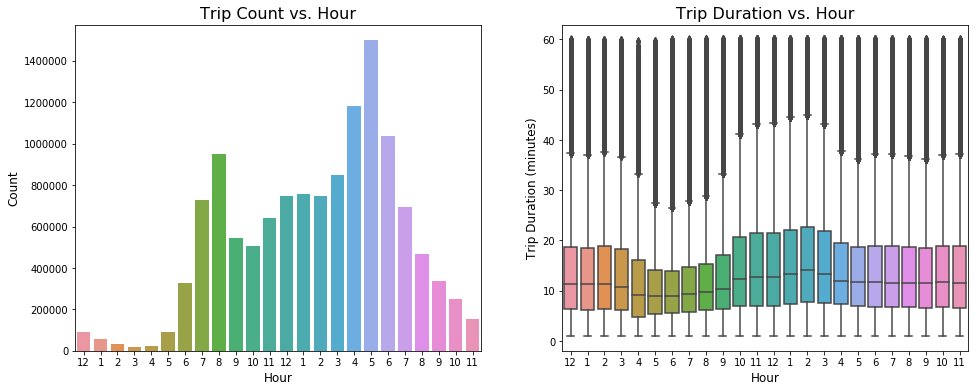

In [20]:
# Hour distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='hour', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Hour', fontsize=16)
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_xticklabels(('12','1','2','3','4','5','6','7','8','9','10','11','12',
                       '1','2','3','4','5','6','7','8','9','10','11'))
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='hour', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_xticklabels(('12','1','2','3','4','5','6','7','8','9','10','11','12',
                       '1','2','3','4','5','6','7','8','9','10','11'))
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()


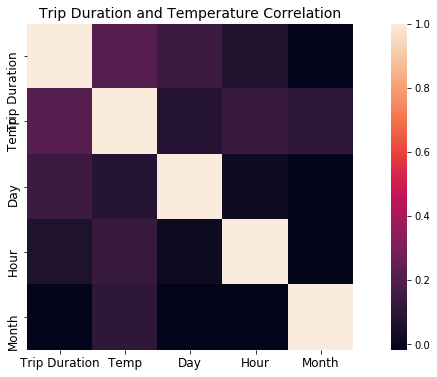

In [28]:
# trip duration vs. temperature correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[['tripduration', 'temperature', 'day', 'hour','month']].corr())
ax.set_xticklabels(labels=['Trip Duration', 'Temp', 'Day', 'Hour', 'Month'], fontsize=12)
ax.set_yticklabels(labels=['Trip Duration', 'Temp', 'Day', 'Hour', 'Month'], fontsize=12)
ax.set_title('Trip Duration and Temperature Correlation', fontsize=14)
plt.axis('image')
plt.show()

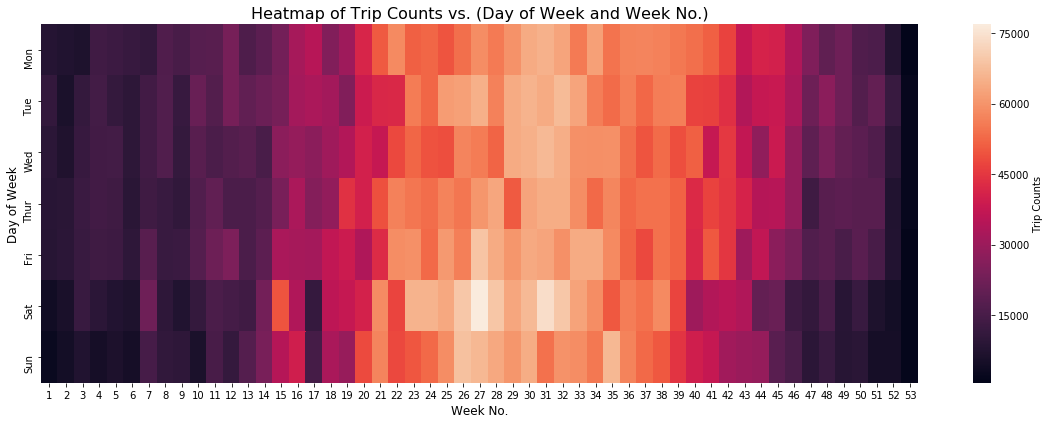

In [31]:
# heatmap of trip count vs. (weekday and week no.)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = data[['day', 'week', 'tripduration']].groupby(['day', 'week']).count().reset_index()
pivots = tmp.pivot('day', 'week', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Week No.)', fontsize=16)
ax.set_xlabel('Week No.', fontsize=12)
ax.set_ylabel('Day of Week', fontsizwe=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

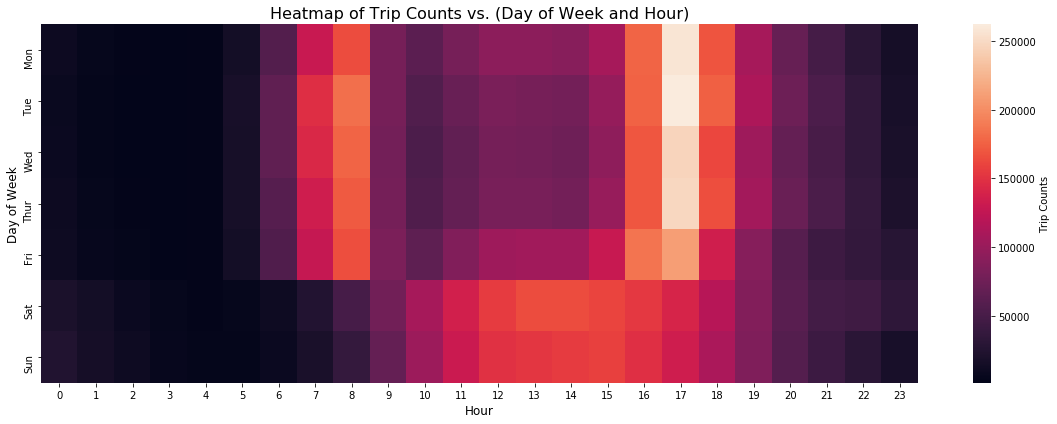

In [38]:
# heatmap of trip count vs. (weekday and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = data[['day', 'hour', 'tripduration']].groupby(['day', 'hour']).count().reset_index()
pivots = tmp.pivot('day', 'hour', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

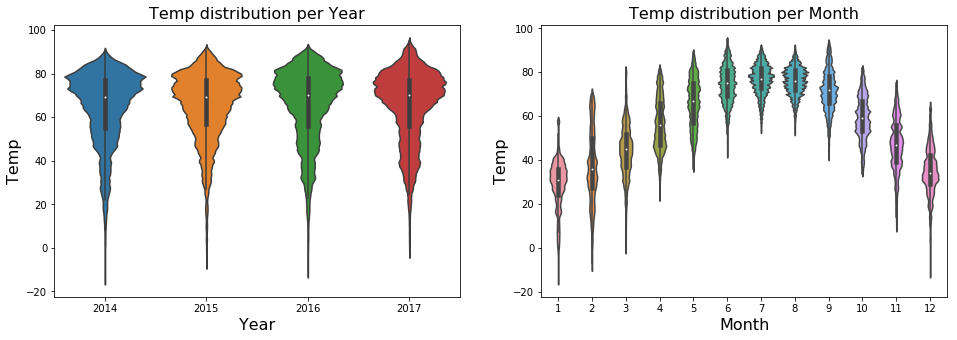

In [6]:
# yearly distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.violinplot(x='year', y='temperature', data=data, ax=ax[0])
ax[0].set_title('Temp distribution per Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=16)
ax[0].set_ylabel('Temp', fontsize=16)

sns.violinplot(x='month', y='temperature', data=data, ax=ax[1])
ax[1].set_title('Temp distribution per Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=16)
ax[1].set_ylabel('Temp', fontsize=16)

plt.show()

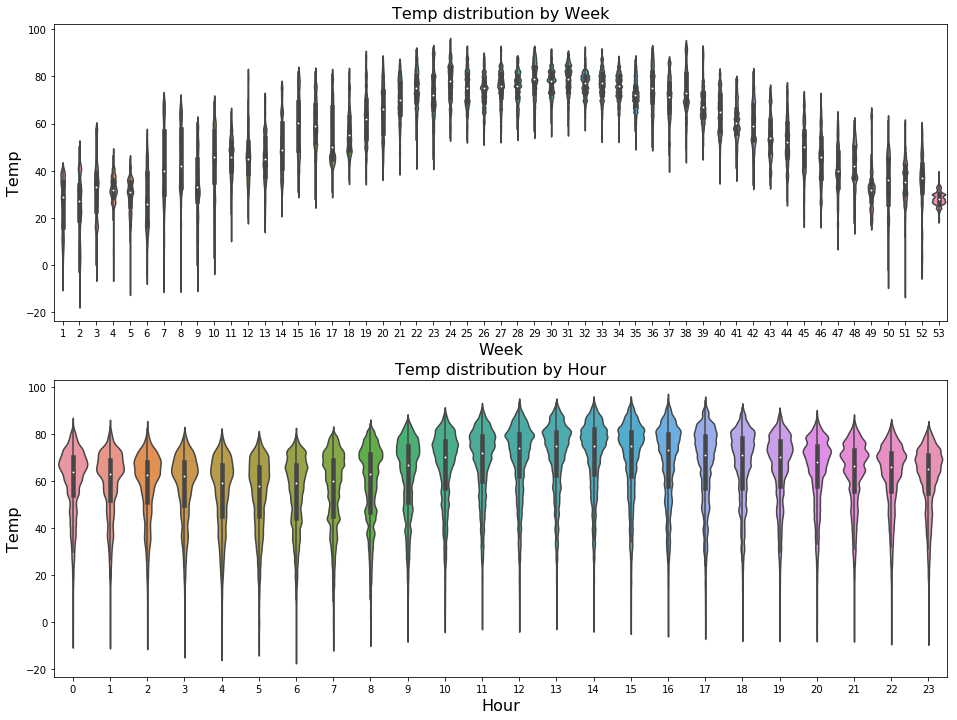

In [3]:
# yearly distribution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
sns.violinplot(x='week', y='temperature', data=data, ax=ax[0])
ax[0].set_title('Temp distribution by Week', fontsize=16)
ax[0].set_xlabel('Week', fontsize=16)
ax[0].set_ylabel('Temp', fontsize=16)

sns.violinplot(x='hour', y='temperature', data=data, ax=ax[1])
ax[1].set_title('Temp distribution by Hour', fontsize=16)
ax[1].set_xlabel('Hour', fontsize=16)
ax[1].set_ylabel('Temp', fontsize=16)

plt.show()

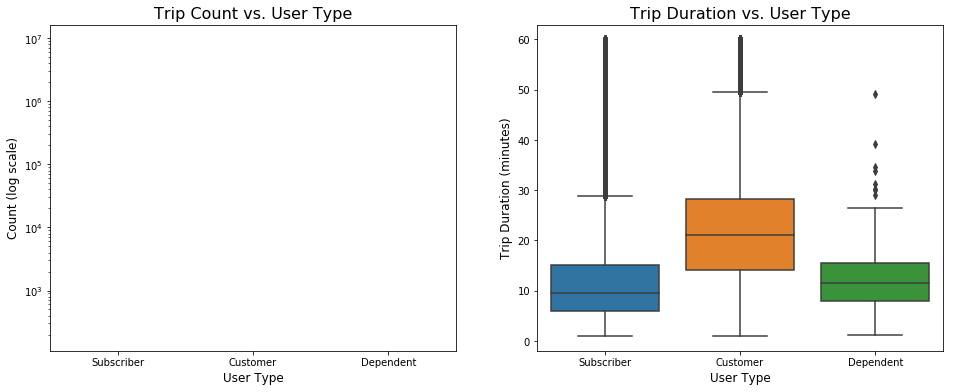

In [2]:
# Trip distribution
# Subscriber: Annual Membership
# Customer: 24-hour pass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x= 'usertype', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='usertype', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. User Type', fontsize=16)
ax[1].set_xlabel('User Type', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

KeyboardInterrupt: 

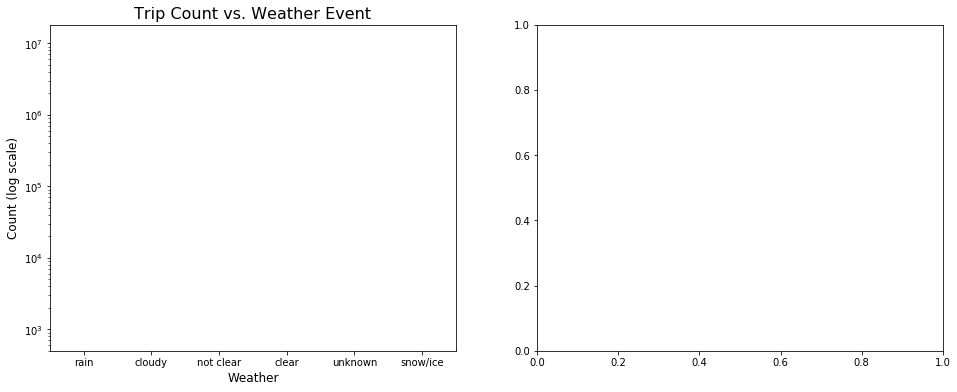

In [3]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='events', data=data, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. Weather Event', fontsize=16)
ax[0].set_xlabel('Weather', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)

sns.boxplot(x='starttime', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Weather', fontsize=16)
ax[1].set_xlabel('Weather', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

In [ ]:
# Trip distribution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(data['tripduration'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(data['tripduration']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

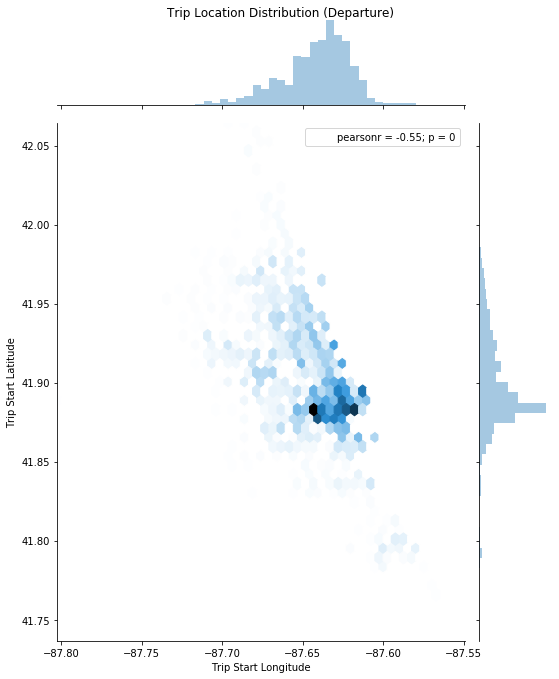

In [9]:
# trip start longitude and latitude distribution
g = sns.jointplot('longitude_start', 'latitude_start', data=data, kind='hex')
g.set_axis_labels('Trip Start Longitude', 'Trip Start Latitude')
g.fig.suptitle('Trip Location Distribution (Departure)')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

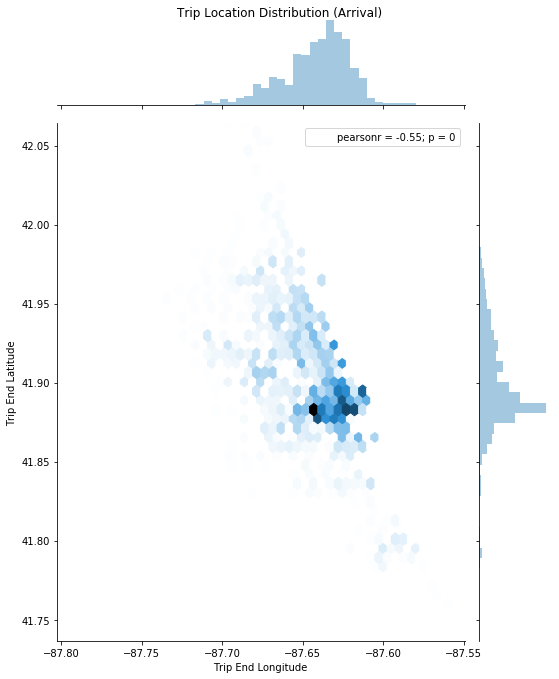

In [11]:
# trip end longitude and latitude distribution
g = sns.jointplot('longitude_end', 'latitude_end', data=data, kind='hex')
g.set_axis_labels('Trip End Longitude', 'Trip End Latitude')
g.fig.suptitle('Trip Location Distribution (Arrival)')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

Text(0,0.5,'Duration (mins)')

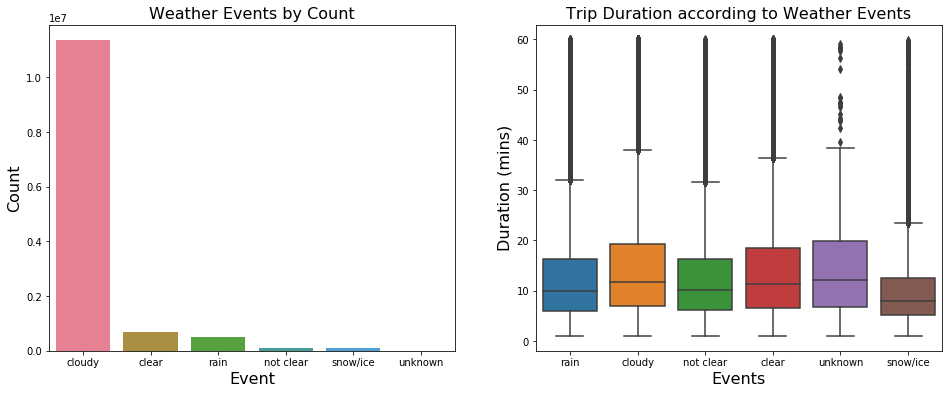

In [5]:
data_ev = data['events'].value_counts().sort_values(ascending=False).to_frame().reset_index()
data_ev = data_ev.rename(columns= {0: 'list'})
data_ev.index.name = 'index'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.barplot(y='events', x='index', data=data_ev, palette='husl', ax=ax[0])
ax[0].set_title('Weather Events by Count', fontsize=16)
ax[0].set_xlabel('Event', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)

sns.boxplot(y='tripduration', x='events', data=data, ax=ax[1])
ax[1].set_title('Trip Duration according to Weather Events', fontsize=16)
ax[1].set_xlabel('Events', fontsize=16)
ax[1].set_ylabel('Duration (mins)', fontsize=16)